In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch import nn
from torch import optim
from tqdm import tqdm
from util.torch_func import get_semeion_data, val_model, train_model,
from util.torch_model import LeNetProTorch

$$LeNetPro$$

In [16]:
epoch_losses, train_scores, test_scores = [], [], []
num_epoch = 100

In [17]:
model = LeNetProTorch(num_classes=10)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = get_semeion_data(batch_size=32)

In [18]:
for epoch in tqdm(range(num_epoch)):
    epoch_loss = train_model(model, optimizer, criterion, train_loader)
    epoch_losses.append(np.mean(epoch_loss))
    # 训练集测试精度
    train_score = val_model(model, train_loader)
    train_scores.append(train_score)
    # 验证集测试精度
    test_score = val_model(model, test_loader)
    test_scores.append(test_score)

100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


$保存数据$

In [19]:
resultData = pd.DataFrame({'epoch_loss': epoch_losses, 'train_score': train_scores, 'test_score': test_scores})
resultData.to_csv(f'./results/{type(model).__name__}-result.csv', index=False)

$绘制图像$

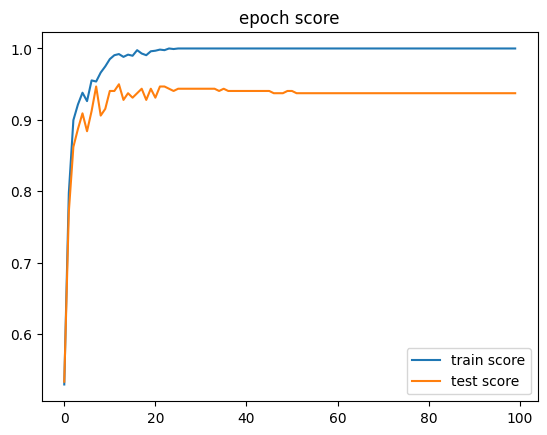

In [23]:
# 训练精度
plt.plot(train_scores, label='train score')
plt.plot(test_scores, label='test score')
plt.title('epoch score')
plt.legend()
plt.savefig(f'./results/{type(model).__name__}-epoch_score.png')
plt.show()

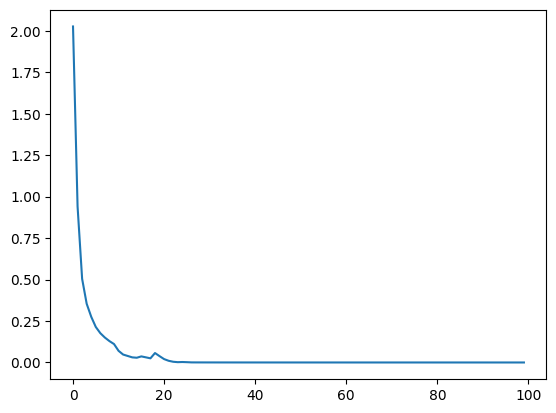

In [22]:
# 训练损失
plt.plot(epoch_losses)
plt.title('epoch loss')
plt.legend(['train epoch loss'])
plt.savefig(f'./results/{type(model).__name__}-epoch_loss.png')
plt.show()